In [325]:
import yfinance as yf
import pandas as pd
import numpy as np

In [326]:
df = yf.download('^VIX')

[*********************100%***********************]  1 of 1 completed


In [327]:
df['1MMA'] = df.Close.rolling('30D').mean()

In [328]:
vix_ = df[df.Close > 1.5 * df['1MMA']]

In [354]:
bool_ = pd.Series(vix_.index).diff() / np.timedelta64(1, 'D') >= 60

In [355]:
bool_[0] = True

In [356]:
bool_

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
Name: Date, dtype: bool

In [357]:
vix_[bool_.values].shape

(17, 7)

In [358]:
vix_ = vix_[bool_.values]

In [359]:
df1 = yf.download('^GSPC')

[*********************100%***********************]  1 of 1 completed


In [360]:
pd.tseries.offsets.DateOffset

pandas._libs.tslibs.offsets.DateOffset

In [361]:
from pandas.tseries.offsets import DateOffset

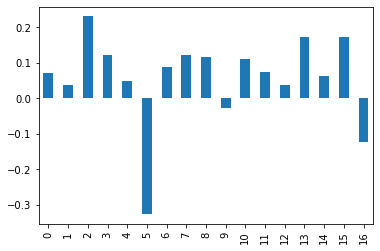

In [367]:
pd.Series(returns).plot(kind='bar')

In [363]:
returns = []

for i in range(len(vix_)):
    x_ = df1[(df1.index >= vix_.index[i]) & 
             (df1.index <= vix_.index[i] + DateOffset(months=6))]
    returns.append((x_.Close.pct_change() + 1).prod() - 1)

In [364]:
x_ = df1[(df1.index >= vix_.index[0]) & (df1.index <= vix_.index[0] + DateOffset(months=6))]

In [365]:
(pd.Series(returns) + 1).prod()

2.2662709251704554

In [366]:
pd.Series(returns).mean()

0.057911630213309556

In [368]:
returns

[0.07068748367720579,
 0.03570122671732756,
 0.23024744269055453,
 0.12263543638458407,
 0.04842606223435886,
 -0.3271128380040973,
 0.08660191380363291,
 0.12068469723190023,
 0.11611740430150763,
 -0.026947209106966352,
 0.11111165699837189,
 0.07437427079532388,
 0.03680610544388374,
 0.17223013451275304,
 0.06366929546829603,
 0.17348169523002843,
 -0.12421706475240257]